In [1]:
#!pip install scikit-learn
!pip install --force-reinstall numpy pandas
!pip install numpy==1.21 pandas==1.3
#!pip install feature-engine

  Using cached numpy-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl (21.2 MB)
  Using cached pandas-2.2.3-cp39-cp39-macosx_10_9_x86_64.whl (12.6 MB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.2
    Uninstalling pytz-2024.2:
      Successfully uninstalled pytz-2024.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2024.2
    Uninstalling tzdata-2024.2:
      Successfully uninstalled tzdata-2024.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
  Attempting uninst

In [2]:
# Verify Installed Versions
import numpy as np
import pandas as pd

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)

Numpy version: 1.21.0
Pandas version: 1.3.0


In [79]:
# importing libs
import os
import pandas as pd

# machine learning libs
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# train-test-split lib
from sklearn.model_selection import train_test_split

# pipeline lib
from sklearn.pipeline import Pipeline

# feature-engine libs
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper

# model lib
import pickle
from joblib import load
from joblib import dump

# machine learning metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [4]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/classification


In [6]:
# Read the dataset
df_abt = pd.read_csv('/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/databases/propensao_revenda_abt.csv')
df_abt.head() 

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [7]:
# key variables
key_vars = ['data_ref_safra', 'seller_id']

# numeric variables
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']

# categorical variables
cat_vars = ['uf']

# target
target = 'nao_revendeu_next_6m'

# creating our dataframe with the variables listed
# excluding key variables, as they are not important
features = cat_vars + num_vars

# creating a dataframe with variables
X = df_abt[features]
X.head()

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
0,SP,3,3,1,2685.00,74
1,ES,171,207,9,21275.23,2
2,SP,38,42,15,781.80,2
3,GO,1,1,1,120.00,16
4,SP,130,141,75,16228.88,8


In [8]:
# creating a dataframe with target variable
y = df_abt[target]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: nao_revendeu_next_6m, dtype: int64

In [9]:
# creating a variable with the logistic regression model
lr_model = LogisticRegression(random_state=42)

# making the model parameters (X, y) available
lr_model.fit(X=X[num_vars], y=y)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [10]:
# interceptor
lr_model.intercept_

array([-1.48739767])

In [11]:
# coefficient
lr_model.coef_

array([[-1.05500593e-02,  6.67061909e-03, -4.34068580e-02,
        -4.50547976e-05,  2.20512256e-02]])

In [12]:
# model prediction
y_pred = lr_model.predict(X[num_vars])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# passing the features manually into the model
lr_model.predict([[3, 3, 1, 2685.0, 74]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [14]:
# dataframe with expected target and predicted target
df_res = pd.DataFrame()

df_res['y_expected'] = y.copy()
df_res['y_predicted'] = y_pred.copy()

df_res

,y_expected,y_predicted
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
5364,1,0
5365,0,0
5366,0,0
5367,0,0


In [15]:
# concatenating my expected/predicted dataframe with my features
df_res = pd.concat([df_abt, df_res], axis=1)

df_res

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m,y_expected,y_predicted
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1,1,0
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0,0,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0,0,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1,1,0
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5364,2018-03-01,ff82e8873fba613f2261a9acc896fd84,MG,4,4,3,124.60,12,1,1,0
5365,2018-03-01,ffc470761de7d0232558ba5e786e57b7,SP,5,5,5,385.59,0,0,0,0
5366,2018-03-01,ffdd9f82b9a447f6f8d4b91554cc7dd3,PR,11,12,8,1450.20,7,0,0,0
5367,2018-03-01,ffeee66ac5d5a62fe688b9d26f83f534,SP,13,13,3,1709.87,0,0,0,0


## Step by step on how to run a classification model in Python.

In the following example, we use Logistic Regression

In [16]:
# creating logistic regression model
lr_model = LogisticRegression(random_state=42)

# making the model parameters (X, y) available
lr_model.fit(X=X[num_vars], y=y)

# model prediction
y_pred = lr_model.predict(X[num_vars])
y_pred

# computing accuracy: how much the predicted accuracy is as expected
acc = accuracy_score(y_true=y, y_pred=y_pred)
acc

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8252933507170795

### Train-Test split

We will learn how to split the dataset into training and testing to balance the Bias-Variance tradeoff.

In [17]:
# computing proportion of target variable
y.value_counts(1)

0    0.61762
1    0.38238
Name: nao_revendeu_next_6m, dtype: float64

In [18]:
# splitting the dataset
# train_size parameter = amount of data in the training set (0 - 1)
# test_size parameter = amount of data in the test set (0 - 1)
train_test_split(X, y, test_size=0.2, random_state=42)

## the set is available in 4 values

[      uf  tot_orders_12m  tot_items_12m  tot_items_dist_12m  receita_12m  \
 4776  SP               5              6                   5       309.90   
 4578  SC               5              5                   1       995.00   
 2948  SP              14             14                   2     21519.50   
 4416  SP              17             17                   8      8563.93   
 2459  PR               4              4                   3       299.69   
 ...   ..             ...            ...                 ...          ...   
 3092  SE               3              3                   2       329.70   
 3772  SP              94             98                  61     23162.00   
 5191  SP              11             11                   6      4299.19   
 5226  SP               1              1                   1        10.90   
 860   SP              13             13                   2      2127.80   
 
       recencia  
 4776       246  
 4578         4  
 2948       174  
 4

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# checking the proportions of the division
X_train.shape, X_test.shape

((4295, 6), (1074, 6))

In [21]:
# checking the proportions of the division
y_train.shape, y_test.shape

((4295,), (1074,))

In [22]:
# checking the proportions of the division
y_train.value_counts(1)

0    0.617695
1    0.382305
Name: nao_revendeu_next_6m, dtype: float64

In [23]:
# checking the proportions of the division
y_test.value_counts(1)

0    0.617318
1    0.382682
Name: nao_revendeu_next_6m, dtype: float64

In [24]:
# creating logistic regression model
lr_model = LogisticRegression(random_state=42)

# making the model parameters (X, y) available
lr_model.fit(X=X_train[num_vars], y=y_train)

# model prediction on the train set
y_pred_train = lr_model.predict(X_train[num_vars])
y_pred

# computing accuracy: how much the predicted hit is expected in the train set
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_train

0.8279394644935972

In [25]:
# model prediction in the test set
y_pred_test = lr_model.predict(X_test[num_vars])
y_pred

# computing accuracy: how much the predicted hit is expected in the test set
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
acc_test

0.8081936685288641

Comparing the models in the 2 data sets (train and test), a slight reduction in our metric is observed. This comparison is used to balance the tradeoff between Bias-Variance.

In [26]:
# splitting the dataset
# train_size parameter = amount of data in the training set (0 - 1)
# test_size parameter = amount of data in the test set (0 - 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

# creating logistic regression model
model = LogisticRegression(random_state=42) 

# making the model parameters (X, y) available
model.fit(X=X_train[num_vars], y=y_train) 

# model prediction on the train set
y_pred_train = model.predict(X_train[num_vars]) 
# computing accuracy: how much the predicted hit is expected in the train set
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train) 

# model prediction in the test set
y_pred_test = model.predict(X_test[num_vars]) 
# computing accuracy: how much the predicted hit is expected in the test set
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test) 

print(f'Accuracy for Training {acc_train * 100:.2f}%') 
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 82.79%
Accuracy for Test 80.82%


#### LogisticRegression model:

- Training Accuracy 82.79%
- Test Accuracy 80.82%

In [27]:
# splitting the dataset
# train_size parameter = amount of data in the training set (0 - 1)
# test_size parameter = amount of data in the test set (0 - 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

# creating logistic regression model
model = DecisionTreeClassifier(random_state=42, max_depth=4) 

# making the model parameters (X, y) available
model.fit(X=X_train[num_vars], y=y_train) 

# model prediction on the train set
y_pred_train = model.predict(X_train[num_vars]) 
# computing accuracy: how much the predicted hit is expected in the train set
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train) 

# model prediction in the test set
y_pred_test = model.predict(X_test[num_vars]) 
# computing accuracy: how much the predicted hit is expected in the test set
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test) 

print(f'Accuracy for Training {acc_train * 100:.2f}%') 
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 84.19%
Accuracy for Test 81.75%


#### DecisionTreeClassifier:

- Training Accuracy 84.19%
- Test Accuracy 81.75%

### Applying feature engineering

In [28]:
# viewing our training dataset
X_train.head()

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
2658,SP,2,2,2,85.29,258
876,MG,2,2,2,223.90,50
959,SP,1,1,1,670.00,1
1143,SP,1,4,1,143.60,61
3787,SP,2,2,2,115.00,4


In [29]:
# viewing our test dataset
X_test.head()

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
72,SP,4,4,4,269.60,42
5029,SP,58,78,25,3088.82,10
126,SP,4,4,3,1094.00,44
4399,PR,1,1,1,343.00,173
166,GO,3,3,3,594.99,62


In [30]:
# transformation of my DataFrame for use in the ML model

# applying OneHotEncoder to categorical variables
ohe = OneHotEncoder(variables=cat_vars)
ohe.fit(X_train)

OneHotEncoder(variables=['uf'])

In [31]:
# applying OneHotEncoder to variable ['uf']
ohe.transform(X_train)

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_SP,uf_MG,uf_SC,uf_DF,uf_PR,...,uf_PA,uf_MS,uf_GO,uf_RN,uf_MT,uf_CE,uf_RO,uf_AM,uf_PI,uf_MA
2658,2,2,2,85.29,258,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,2,2,2,223.90,50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
959,1,1,1,670.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1143,1,4,1,143.60,61,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3787,2,2,2,115.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,16,21,13,6821.43,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
691,13,13,2,4387.00,48,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,2,2,2,677.00,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4580,59,69,10,5633.62,211,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# after counting the columns in training and testing, it is clear that there are
# 4 extra columns in training
ohe.transform(X_train).columns

Index(['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m',
       'recencia', 'uf_SP', 'uf_MG', 'uf_SC', 'uf_DF', 'uf_PR', 'uf_BA',
       'uf_RS', 'uf_RJ', 'uf_PB', 'uf_ES', 'uf_SE', 'uf_PE', 'uf_PA', 'uf_MS',
       'uf_GO', 'uf_RN', 'uf_MT', 'uf_CE', 'uf_RO', 'uf_AM', 'uf_PI', 'uf_MA'],
      dtype='object')

In [33]:
# after counting the columns in training and testing, it is clear that there are
# 4 more columns in trainingohe.transform(X_test).columns
ohe.transform(X_test).columns

Index(['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m',
       'recencia', 'uf_SP', 'uf_MG', 'uf_SC', 'uf_DF', 'uf_PR', 'uf_BA',
       'uf_RS', 'uf_RJ', 'uf_PB', 'uf_ES', 'uf_SE', 'uf_PE', 'uf_PA', 'uf_MS',
       'uf_GO', 'uf_RN', 'uf_MT', 'uf_CE', 'uf_RO', 'uf_AM', 'uf_PI', 'uf_MA'],
      dtype='object')

In [34]:
# transformation of my DataFrame for use in the ML model

# applying OneHotEncoder to categorical variables
ohe = OneHotEncoder(variables=cat_vars)
ohe.fit(X_train)

X_train_transformed = ohe.transform(X_train)
X_train_transformed.head(3)

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_SP,uf_MG,uf_SC,uf_DF,uf_PR,...,uf_PA,uf_MS,uf_GO,uf_RN,uf_MT,uf_CE,uf_RO,uf_AM,uf_PI,uf_MA
2658,2,2,2,85.29,258,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,2,2,2,223.90,50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
959,1,1,1,670.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# creating my logistic regression model and applying it to the sets
model = LogisticRegression(random_state=42)
model.fit(X=X_train_transformed, y=y_train)

# model prediction on the train set
y_pred_train = model.predict(X_train_transformed)

# computing accuracy: how much the predicted hit is expected in the train set
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)

# model prediction in the test set
# it is necessary to do this transformation in the test set for it to work
y_pred_test = model.predict(ohe.transform(X_test)) 
# computing accuracy: how much the predicted hit is expected in the test set
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test) 


print(f'Accuracy for Training {acc_train * 100:.2f}%') 
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 82.77%
Accuracy for Test 80.73%


/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# applying OneHotEncoder to my categorical variables

# dividing my dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

# transformation of categorical data
ohe = OneHotEncoder(variables=cat_vars) 
ohe.fit(X_train)
# applying the transformation to the training and test sets
X_train_transformed = ohe.transform(X_train) 
X_test_transformed = ohe.transform(X_test) 

# creation of the machine learning model for categorical data
model = LogisticRegression(random_state=42) 
model.fit(X=X_train_transformed, y=y_train)

# Result based on training 
y_pred_train = model.predict(X_train_transformed) 
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train) 
print(f'Accuracy for Training {acc_train * 100:.2f}%') 

# Result in the test base 
y_pred_test = model.predict(X_test_transformed) 
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test) 
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 82.77%
Accuracy for Test 80.73%


/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# aplicando StandardScaler para minhas variáveis numéricas

# dividing my dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# transformation of numeric data
std_scaler = SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)
std_scaler.fit(X_train_transformed)

# applying the transformation to the training and test sets
X_train_transformed_with_std_scaler = std_scaler.transform(X_train_transformed) 
X_test_transformed_with_std_scaler = std_scaler.transform(X_test_transformed) 

# creation of the machine learning model for numerical data
model = LogisticRegression(random_state=42) 
model.fit(X=X_train_transformed_with_std_scaler, y=y_train) 

# Result based on training 
y_pred_train = model.predict(X_train_transformed_with_std_scaler) 
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train) 
print(f'Accuracy for Training {acc_train * 100:.2f}%') 

# Result in the test base 
y_pred_test = model.predict(X_test_transformed_with_std_scaler) 
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test) 
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 83.07%
Accuracy for Test 80.73%


In [39]:
# dividing my dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

# transformation of categorical data
ohe = OneHotEncoder(variables=cat_vars) 
ohe.fit(X_train)
# applying the transformation to the training and test sets
X_train_transformed = ohe.transform(X_train) 
X_test_transformed = ohe.transform(X_test) 

# transformation of numeric data
std_scaler = SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)
std_scaler.fit(X_train_transformed)
# applying the transformation to the training and test sets
X_train_transformed_with_std_scaler = std_scaler.transform(X_train_transformed) 
X_test_transformed_with_std_scaler = std_scaler.transform(X_test_transformed)

# creation of the machine learning model for categorical data
model = LogisticRegression(random_state=42) 
model.fit(X=X_train_transformed, y=y_train)

# creation of the machine learning model for numerical data
model = LogisticRegression(random_state=42) 
model.fit(X=X_train_transformed_with_std_scaler, y=y_train) 

# Result based on training categorical variables
y_pred_train = model.predict(X_train_transformed) 
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train) 
print(f'Accuracy for Training {acc_train * 100:.2f}%') 

# Result based on training numerical variables
y_pred_train = model.predict(X_train_transformed_with_std_scaler) 
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train) 
print(f'Accuracy for Training {acc_train * 100:.2f}%') 

# Result on the test basis for categorical variables
y_pred_test = model.predict(X_test_transformed) 
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test) 
print(f'Accuracy for Test {acc_test * 100:.2f}%') 

# Result on the test basis of numerical variables
y_pred_test = model.predict(X_test_transformed_with_std_scaler) 
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test) 
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 77.51%
Accuracy for Training 83.07%
Accuracy for Test 76.44%
Accuracy for Test 80.73%


/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Analysis of Machine Learning Results

### Dataset Preparation
The dataset was divided into training and testing sets:

##### Training Set: 
- Used to train the machine learning model (80% of the dataset).

##### Testing Set: 
- Used to evaluate the model's performance (20% of the dataset).

##### Stratified Sampling: 
- Ensured that the target variable's distribution is consistent across both training and testing sets.


### Data Transformation
Two types of transformations were applied:

##### Categorical Data: 
- Encoded using OneHotEncoder, which converts categorical variables into a binary (0/1) format suitable for machine learning models.

##### Numeric Data: 
- Standardized using StandardScaler, which scales the numerical features to have a mean of 0 and a standard deviation of 1, improving model performance.


### Logistic Regression Models
Two logistic regression models were trained:

##### Model 1 (Categorical Data): 
- Trained on the dataset with only categorical variables transformed by the OneHotEncoder.

##### Model 2 (Numerical Data): 
- Trained on the dataset with both categorical and numerical variables, where numerical features were standardized.
Results


### The models were evaluated using Accuracy, which measures the percentage of correct predictions. Here are the results:

##### Model 1 (Categorical Data)

- Training Accuracy: 77.51%
- Testing Accuracy: 76.44%


##### Model 2 (Numerical Data + Standard Scaling)

- Training Accuracy: 83.07%
- Testing Accuracy: 80.73%

### Insights

##### Improved Performance with Numeric Data:
- Including and standardizing numerical variables significantly improved model performance.
- This highlights the importance of numeric features and proper scaling in machine learning models.

##### Low Overfitting:
- Both models achieved similar accuracies on training and testing datasets, indicating low overfitting.

##### Better Generalization:
- The inclusion of numerical variables allowed the model to generalize better, as evidenced by the improved test accuracy.

### Importing Pipeline into the command sequence

1. Instantiate our encoder (transformation of my categorical variables into numerical variables)

2. Application of the encoder to the training set (generation of a new DataFrame with new transformed columns)

3. Transformation of the test set from the training set results (I apply the transformation to the test set to allow the code to work)

4. With the data pipeline, we can perform several transformations, and only one fit of the model.

**More important is that, from now on, every time we use a Machine Learning model or some model Algorithm, we will carry out the steps of this process!**

In [40]:
# applying a pipeline to perform all transformations 
# after completion, run the machine learning model
# this step would be the unification of the transformation steps of the last cell, 
# but with all steps being executed, following the specified order

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


data_pipe = Pipeline(steps=[
                ('onehot_encoder', OneHotEncoder(variables=cat_vars)),
                ('std_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars))
])

data_pipe.fit(X_train)
X_train_transformed = data_pipe.transform(X_train)
X_test_transformed= data_pipe.transform(X_test)



model = LogisticRegression(random_state=42)
model.fit(X=X_train_transformed, y=y_train)

# Result based on training
y_pred_train = model.predict(X_train_transformed)
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
print(f'Accuracy for Training {acc_train * 100:.2f}%')

# Result in the test base
y_pred_test = model.predict(X_test_transformed)
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 83.07%
Accuracy for Test 80.73%


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline(steps=[
                ('onehot_encoder', OneHotEncoder(variables=cat_vars)),
                ('std_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                ('rl', LogisticRegression(random_state=42))
])

pipeline.fit(X=X_train, y=y_train)

#Result on training basis
y_pred_train = pipeline.predict(X_train)
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
print(f'Accuracy for Training {acc_train * 100:.2f}%')

# Result in the test base
y_pred_test = pipeline.predict(X_test)
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print(f'Accuracy for Test {acc_test * 100:.2f}%')

Accuracy for Training 83.07%
Accuracy for Test 80.73%


## Saving our data pipeline + algorithm with the pickle library

In [48]:
# Save pipeline and model
dump([pipeline, model], '/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/classification/models/pipeline_baseline_rl.joblib')

['/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/classification/models/pipeline_baseline_rl.joblib']

In [49]:
# Load pipeline and model
pipeline, model = load('/Users/dellacorte/py-projects/data-science/supervised-learning-pipeline-reference/classification/models/pipeline_baseline_rl.joblib')

## Pipeline Examples

In [50]:
# creation of the pipeline with the necessary steps
# creation of necessary data transformations (preprocessing)
# creation of algorithms that will be used as a model
data_steps = [
                ('onehot_encoder', OneHotEncoder(variables=cat_vars)),
                ('std_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars))
]

algorithms = [
              ('rl', LogisticRegression(random_state=42)),
              ('dt', DecisionTreeClassifier(random_state=42)),
]

In [51]:
# applying model [0]
pipeline = Pipeline(steps=data_steps + [algorithms[0]])
pipeline

Pipeline(steps=[('onehot_encoder', OneHotEncoder(variables=['uf'])),
                ('std_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_12m',
                                                      'tot_items_12m',
                                                      'tot_items_dist_12m',
                                                      'receita_12m',
                                                      'recencia'])),
                ('rl', LogisticRegression(random_state=42))])

In [52]:
# applying the model [1]
pipeline = Pipeline(steps=data_steps + [algorithms[1]])
pipeline

Pipeline(steps=[('onehot_encoder', OneHotEncoder(variables=['uf'])),
                ('std_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_12m',
                                                      'tot_items_12m',
                                                      'tot_items_dist_12m',
                                                      'receita_12m',
                                                      'recencia'])),
                ('dt', DecisionTreeClassifier(random_state=42))])

## Applying Stratified K-fold

As our problem works with time, and we have a time slip, the best application would be Out-of-time.

Similar to Hold-out, but with skf the separation is not random, while Hold-out performs the separation randomly.

In [56]:
# first thing would be to separate the sets into train and oot
df_train = df_abt.query('data_ref_safra < "2018-03-01"')
df_oot = df_abt.query('data_ref_safra == "2018-03-01"')

# Table key variables
key_vars = ['data_ref_safra', 'seller_id']

# Numeric variables
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']

# Categorical variables
cat_vars = ['uf']

# Response/target variable
target = 'nao_revendeu_next_6m'

# Creating the list with features
features = cat_vars + num_vars

In [57]:
# applying the variables to my training sets
X_train = df_train[features]
y_train = df_train[target]

# applying the variables to my oot sets
X_oot = df_oot[features]
y_oot = df_oot[target]

In [58]:
# applying stratified k-fold to X_train
X_train
pipeline = Pipeline(steps=[
                ('onehot_encoder', OneHotEncoder(variables=cat_vars)),
                ('std_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
                ('rl', LogisticRegression(random_state=42))
])

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_val_score(estimator=pipeline, X=X_train, y=y_train, scoring="accuracy", cv=skf)

print(cv_results)
print(cv_results.mean() * 100)
print(cv_results.std()  * 100)

[0.82689557 0.81688126 0.81688126 0.81545064 0.84978541]
82.51788268955652
1.2967403941201308


In [61]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehot_encoder', OneHotEncoder(variables=['uf'])),
                ('std_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_12m',
                                                      'tot_items_12m',
                                                      'tot_items_dist_12m',
                                                      'receita_12m',
                                                      'recencia'])),
                ('rl', LogisticRegression(random_state=42))])

In [63]:
# resultado na base de treino
y_pred_train = pipeline.predict(X_train)
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
print(f'Training Accuracy {acc_train * 100:.2f}%')

Training Accuracy 82.66%


In [64]:
# resultado na base de teste
y_pred_oot = pipeline.predict(X_oot)
acc_oot = accuracy_score(y_true=y_oot, y_pred=y_pred_oot)
print(f'Testing/OOT Accuracy {acc_oot * 100:.2f}%')

Testing/OOT Accuracy 82.55%


## Calculating metrics

The next step is to optimize our model by calculating the metrics

In [67]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# applying several metrics to calculate model performance
# we are using cross_validate to calculate the metrics
cv_results = cross_validate(estimator=pipeline, X=X_train, y=y_train,  scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf)
df_cv_results = pd.DataFrame(cv_results)

In [68]:
# calculating the average
df_cv_results.mean()

fit_time          0.034676
score_time        0.024265
test_accuracy     0.825179
test_precision    0.850291
test_recall       0.656920
test_f1           0.741007
test_roc_auc      0.898444
dtype: float64

In [69]:
# calculating the standard_deviation
df_cv_results.std()

fit_time          0.009095
score_time        0.001971
test_accuracy     0.014498
test_precision    0.019290
test_recall       0.029583
test_f1           0.023779
test_roc_auc      0.015565
dtype: float64

In [70]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehot_encoder', OneHotEncoder(variables=['uf'])),
                ('std_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_12m',
                                                      'tot_items_12m',
                                                      'tot_items_dist_12m',
                                                      'receita_12m',
                                                      'recencia'])),
                ('rl', LogisticRegression(random_state=42))])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


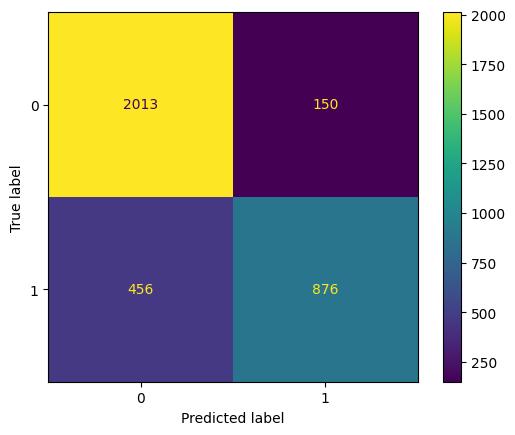

In [72]:
# calculating the confusion_matrix
plot_confusion_matrix(pipeline, X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


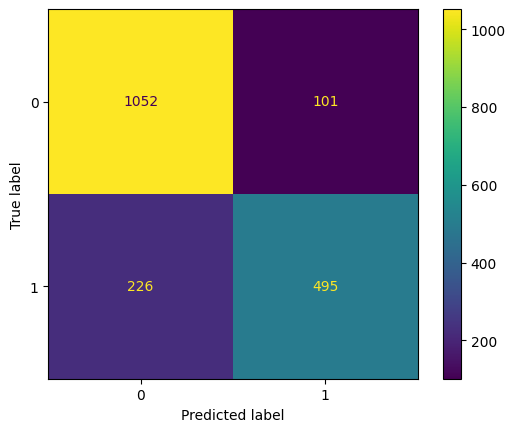

In [73]:
plot_confusion_matrix(pipeline, X_oot, y_oot, values_format='d')

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


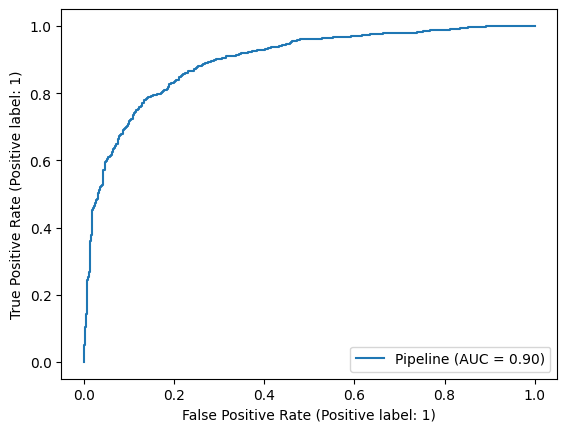

In [75]:
# applying roc_curve
plot_roc_curve(pipeline, X_oot, y_oot)

In [77]:
# applying classification_report to analyze metrics data
print(classification_report(y_oot, pipeline.predict(X_oot)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1153
           1       0.83      0.69      0.75       721

    accuracy                           0.83      1874
   macro avg       0.83      0.80      0.81      1874
weighted avg       0.83      0.83      0.82      1874



In [80]:
# applying metrics individually
print(f"Accuracy (Training): {accuracy_score(y_train, pipeline.predict(X_train))}")
print(f"Accuracy (Test): {accuracy_score(y_oot, pipeline.predict(X_oot))}")
print("====================================")
print(f"Balanced Accuracy (Training): {balanced_accuracy_score(y_train, pipeline.predict(X_train))}")
print(f"Balanced Accuracy (Test): {balanced_accuracy_score(y_oot, pipeline.predict(X_oot))}")
print("====================================")
print(f"Precision (Training): {precision_score(y_train, pipeline.predict(X_train))}")
print(f"Precision (Test): {precision_score(y_oot, pipeline.predict(X_oot))}")
print("====================================")
print(f"Recall (Training): {recall_score(y_train, pipeline.predict(X_train))}")
print(f"Recall (Test): {recall_score(y_oot, pipeline.predict(X_oot))}")
print("====================================")
print(f"F1-Score (Training): {f1_score(y_train, pipeline.predict(X_train))}")
print(f"F1-Score (Test): {f1_score(y_oot, pipeline.predict(X_oot))}")
print("====================================")
print(f"ROCAUC (Training): {roc_auc_score(y_train, pipeline.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Test): {roc_auc_score(y_oot, pipeline.predict_proba(X_oot)[:,1])}")

Accuracy (Training): 0.8266094420600858
Accuracy (Test): 0.8255069370330843
Balanced Accuracy (Training): 0.7941547650285514
Balanced Accuracy (Test): 0.7994744458465103
Precision (Training): 0.8538011695906432
Precision (Test): 0.8305369127516778
Recall (Training): 0.6576576576576577
Recall (Test): 0.6865464632454924
F1-Score (Training): 0.7430025445292621
F1-Score (Test): 0.7517084282460137
ROCAUC (Training): 0.9013248685578783
ROCAUC (Test): 0.8968499229532076


In [81]:
lr_model_pipe = pipeline

In [82]:
metrics = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'mode': ['training', 'oot'],
    'accuracy': [accuracy_score(y_train, lr_model_pipe.predict(X_train)), accuracy_score(y_oot, lr_model_pipe.predict(X_oot))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr_model_pipe.predict(X_train)), balanced_accuracy_score(y_oot, lr_model_pipe.predict(X_oot))],
    'precision': [precision_score(y_train, lr_model_pipe.predict(X_train)), precision_score(y_oot, lr_model_pipe.predict(X_oot))],
    'recall': [recall_score(y_train, lr_model_pipe.predict(X_train)), recall_score(y_oot, lr_model_pipe.predict(X_oot))],
    'f1_score': [f1_score(y_train, lr_model_pipe.predict(X_train)), f1_score(y_oot, lr_model_pipe.predict(X_oot))],
    'rocauc': [roc_auc_score(y_train, lr_model_pipe.predict_proba(X_train)[:,1]), roc_auc_score(y_oot, lr_model_pipe.predict_proba(X_oot)[:,1])]

}

pd.DataFrame(metrics)

,model,mode,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,training,0.826609,0.794155,0.853801,0.657658,0.743003,0.901325
1,Logistic Regression,oot,0.825507,0.799474,0.830537,0.686546,0.751708,0.896850


In [ ]:
#